# Homework 1

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *The Harvard Management Company and Inflation-Indexed Bonds*

### Notation
(Hidden LaTeX commands)

$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

***

# 1. HMC's Approach

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

### 1. 
There are thousands of individual risky assets in which HMC can invest. Explain why MV optimization across 1,000 securities is infeasible.

<span style="color:blue;">

The MV solution requires us to invert the covariance matrix: $\Sigma^{-1}$. In this kind of situation, the estimation error of expected returns and covariances become significant. With a thousand securities the data available is insufficient for reliable estimation and the optimization will unstable results.

The unstable results are highly sensitive to changes in input data. If the input data in the out-of-sample is slightly different from the in-sample, the out-of-sample optimal portfolio will have considerably different weights from the in-sample.

</span>

### 2.
Rather than optimize across all securities directly, HMC runs a two-stage optimization.
1. They build asset class portfolios with each one optimized over the securities of the specific asset class.  
2. HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?

<span style="color:blue;">

For the two-stage optimization to be a good approximation securities within each of the asset classes must be highly correlated while securities of different assets classes must have lower correlation. In other words, within a group of securities, return characteristics must be highly homogeneous and asset classes must be sufficiently distinct.

If those two conditions are met, the two-stage process can approximate well the full MV-optimization.

</span>

### 3.
Should TIPS form a new asset class or be grouped into one of the other 11 classes?

<span style="color:blue;">
There are arguments for both sides.

Favorable arguments for TIPS being a separate asset class:
- TIPS provide a high diversification component, having lower correlation to bonds than SPY to other equity buckets.
- TIPS returns are a direct protection to inflation, having a priori a different return characteristic when compared to any other asset class.

Favorable arguments for TIPS NOT being a separate asset class:
- TIPS have a priori a similar default risk to public bonds.
- Adding TIPS mostly impacts the allocation in domestic bonds, which favours the idea that it could be just another asset in this bucket.

</span>

### 4. 
Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?

<span style="color:blue;">
HMC prioritizes real returns over nominal returns in portfolio analysis because real returns account for inflation, providing a more accurate measure of purchasing power and true investment performance. 

The use of real returns leads to a different MV solution when compared to the same optimization using nominal returns. Consequently, the decision between using real or nominal return has a direct effect in the optimal portfolio. If HMC were to use nominal returns, the investment allocation could be suboptimal, as the optimization favour higher nominal returns vis-à-vis returns adjusted by inflation.

</span>

### 5.
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.

How might we adjust the stated optimization problem in the lecture notes to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6?

<span style="color:blue;">

$$
\displaystyle \min_{\omega} \mathbf{\omega'} \mathbf{\Sigma} \mathbf{\omega}
$$

$$
\text{ such that }\mathbf{\omega' \mu} = \mu^{*}
$$

$$
\omega^{i} \geq a^{i}, \forall i
$$

With the new constrains, the problem has no closed formula solution. In practice, MV frontier is widely used with constraints. While the formula leads to less extreme weights, it is highly sensitive to the constraint boundaries and requires the investor to set a great amount of arbitrary parameters.

More recently, Machine Learning algorithms of regularization have gained traction in MV optimization: RIDGE and LASSO and Elastic Net also produce less extreme weight allocation and do not require investors to set arbitrary boundaries.

</span>

### 6. 
Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

<span style="color:blue;">
In Exhibit 5, assuming certain conditions, an MV optimization strategy involves shorting domestic equities and domestic bonds to increase exposure to other long positions, particularly TIPS, due to their attractive Sharpe Ratio and hedging properties. This strategy is consistent across various expected return targets.

</span>

### 7.
Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?

<span style="color:blue;">
In Exhibit 6, with stricter constraints, achieving any expected return target requires higher volatility. Consequently, the Mean/Volatility Ratios decrease from 0.38 to 0.35 in most cases. This signifies a nearly 10% decline in optimization performance when transitioning from Exhibit 5 to Exhibit 6 due to increased constraints. An unconstrained solution would yield a Mean/Volatility Ratio exceeding 0.80. For expected return targets further from the tangency point, this decline in performance worsens as the MV-efficient portfolios cannot be attained through appropriate short positions.

</span>

***

# 2 Mean-Variance Optimization

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code. </i>

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

### Model
We are going to analyze the problem in terms of **excess** returns.
- Thus, you will focus on the `Excess Returns` section of the lecture notes, especially the formulas on slide 50.
- Be sure to use the`excess returns` tab of the data.

### Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- The Sharpe Ratio is the mean return divided by the volatility of returns. Accordingly, we can annualize the Sharpe Ratio with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe). 

### Footnotes

#### Data File
* The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

#### Risk-free rate
* In the lecture-note we considered a constant risk-free rate. It is okay that our risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.

## 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:

$$
\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}
$$

In [183]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.insert(0, parent_dir)
import port_management_helper.helper as pmh

assets_excess_returns = pmh.read_excel_default("data/multi_asset_etf_data.xlsx", sheet_name="excess returns").loc[:"2021"]
assets_excess_returns.tail()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
date,,,,,,,,,,,
2021-08-31,-0.0089,-0.0162,0.0159,0.0146,0.0063,-0.0038,0.0196,0.0145,0.0014,0.0299,-0.0015
2021-09-30,-0.0237,0.0521,-0.0387,-0.0326,-0.0037,-0.0160,-0.0563,-0.0832,-0.0134,-0.0466,-0.0078
2021-10-31,-0.0042,0.0582,0.0110,0.0321,-0.0028,-0.0042,0.0730,0.0951,0.0110,0.0704,0.0114
2021-11-30,-0.0057,-0.0871,-0.0404,-0.0449,-0.0112,0.0114,-0.0237,-0.0416,-0.0145,-0.0076,0.0091
2021-12-31,-0.0019,0.0665,0.0148,0.0436,0.0226,-0.0055,0.0944,0.0192,0.0079,0.0460,0.0038


In [184]:
pmh.calc_summary_statistics(
    assets_excess_returns,
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=['Annualized Vol', 'Annualized Mean', 'Annualized Sharpe']
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
BWX,0.0053,0.0661,0.0796
DBC,-0.0166,0.1731,-0.0961
EEM,0.0375,0.1791,0.2093
EFA,0.0612,0.1459,0.4194
HYG,0.0479,0.0719,0.6665
IEF,0.0331,0.0539,0.6140
IYR,0.1064,0.1553,0.6852
PSP,0.1140,0.1992,0.5725
QAI,0.0208,0.0453,0.4585
SPY,0.1433,0.1342,1.0675


In [185]:
(
    pmh.calc_summary_statistics(
        assets_excess_returns,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Annualized Sharpe']
    )
    .sort_values("Annualized Sharpe")
    .reset_index()
    .loc[lambda df: df.index.isin([0, len(df.index)-1])]
    .rename(columns={"index": "Asset"})
    .assign(Label=["Worst Sharpe", "Best Sharpe"])
)

,Asset,Annualized Sharpe,Label
0,DBC,-0.0961,Worst Sharpe
10,SPY,1.0675,Best Sharpe


<span style="color:blue;">
SPY (SPDR S&P 500) has the best Sharpe Ratio and BWX (SPDR Bloomberg International Tr) has the worst Sharpe Ratio.

</span>

## 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

The highest correlation (91.82%) is between EFA and PSP
The lowest correlation (-37.57%) is between IEF and DBC


<Axes: >

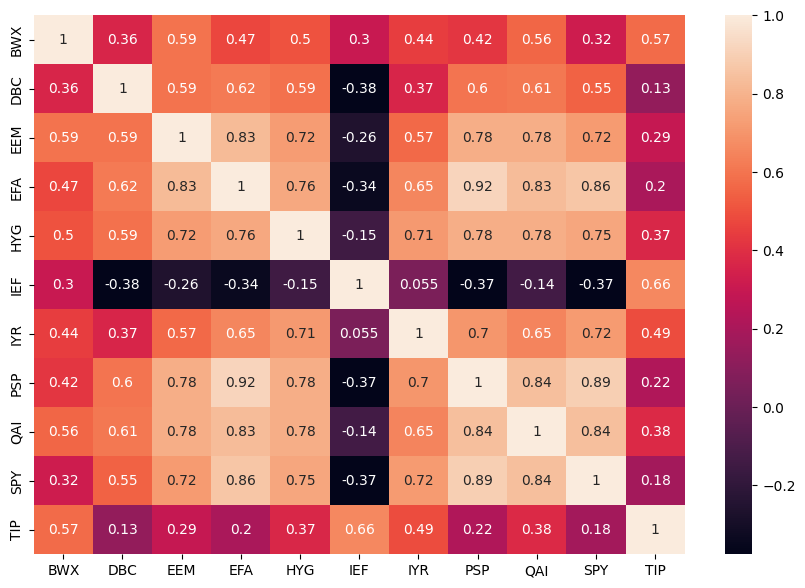

In [186]:
pmh.calc_correlations(assets_excess_returns)

<span style="color:blue;">
TIP had an above-average performance adjusted by risk (Sharpe Ratio). Its average return is among the lowest, but its volatility is quite low as well.

TIP is among the most uncorrelated assets (darker in the correlation panel), which emphasizes its roll in providing diversification.

TIPS has performed better than BWX (SPDR Bloomberg International Tr - international bonds) and IEF (iShares 7-10 Year Treasury Bond - domestic bonds).

The performance of TIPS has been especially good in the last three years when compared to other fixed income assets.

</span>

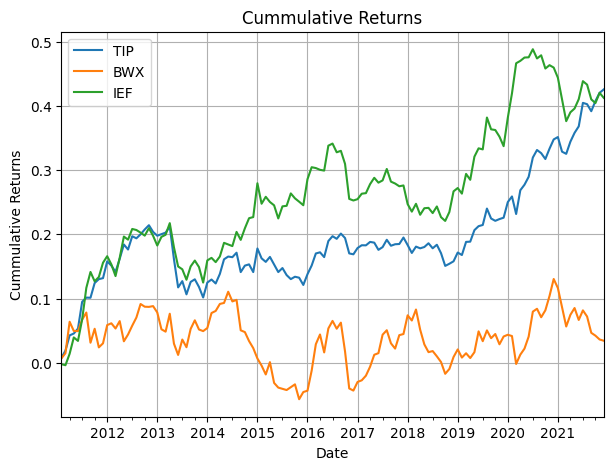

In [187]:
pmh.calc_cummulative_returns(assets_excess_returns[['TIP', 'BWX', 'IEF']])

In [188]:
pmh.calc_summary_statistics(
    assets_excess_returns[['TIP', 'BWX', 'IEF']],
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=[
        "Annualized Mean", "Annualized Vol", "Annualized Sharpe",
        "Max Drawdown", "Peak", "Bottom", "Correlation",
        "Annualized Historical VaR", "Kurtosis", "Skewness"
    ]
).transpose()

,TIP,BWX,IEF
Annualized Mean,0.0335,0.0053,0.0331
Annualized Vol,0.0436,0.0661,0.0539
Annualized Sharpe,0.7686,0.0796,0.6140
Skewness,-0.2972,-0.3344,0.3161
Excess Kurtosis,1.4867,0.2490,0.2776
Annualized Historical VaR (5.00%),-0.0586,-0.1071,-0.0758
Max Drawdown,-0.0927,-0.1508,-0.0899
Peak,2012-11-30 00:00:00,2014-06-30 00:00:00,2016-07-31 00:00:00
Bottom,2013-12-31 00:00:00,2015-11-30 00:00:00,2018-10-31 00:00:00
TIP Correlation,1.0000,0.5711,0.6583


## 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.

<span style="color:blue;">
The ranking of the weights does not perfectly align with the ranking of the Sharpe ratio. Generally, the tangency portfolio will assign a bigger weight to assets that:
1. Have higher mean returns.
2. Have lower volatility (variance).
3. Have lower covariance with other assets.

Points (1) and (2) relate directly to Sharpe ratios: intuitively, the higher an asset's Sharpe ratio, the more you should hold of that asset.

Point (3), however, highlights the importance of covariance. Even an asset with a poor Sharpe ratio can be valuable in a portfolio if it has a low correlation with other assets. This asset may be optimized with a higher weight than assets with higher Sharpe ratios but higher correlations.

</span>

### Extra on Tangency Portfolio
<span style="color:blue;">

The tangency portfolio in this special case has very peculiar statistics.

In a normal case, the tangency portfolio will have a bigger Sharpe ratio than every other asset. Nonetheless, this is not always true: as we can see below, the Sharpe ratio is -1.6. This happens because the tangency portfolio is only a mathematical optimization which shows the portfolio tangent to the frontier which is also in the line that crosses the origin. When the GMV is below the x-axis (the return of the global minimum variance portfolio is smaller than 0), the tangency point between the line that crosses the origin and touches the efficient frontier happens below the GMV, providing this unsual result. If you are interested in knowing more, Mark has posted an interested deeper dive into the topic: https://canvas.uchicago.edu/courses/58435/discussion_topics/780421'

</span>

In [189]:
analysis_sharpe_vs_tangent_weights = (
    pmh.calc_summary_statistics(
        assets_excess_returns,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Tangency Weights', 'Annualized Sharpe']
    )
    .sort_values('Annualized Sharpe', ascending=False)
)
analysis_sharpe_vs_tangent_weights

,Annualized Sharpe,Tangency Weights
SPY,1.0675,2.5830
TIP,0.7686,0.0647
IYR,0.6852,-0.7122
HYG,0.6665,0.6588
IEF,0.6140,3.0508
PSP,0.5725,0.2226
QAI,0.4585,-4.1671
EFA,0.4194,-0.4476
EEM,0.2093,0.0719
BWX,0.0796,-0.3735


,Tangency Weights
BWX,-0.3735
DBC,0.0485
EEM,0.0719
EFA,-0.4476
HYG,0.6588
IEF,3.0508
IYR,-0.7122
PSP,0.2226
QAI,-4.1671
SPY,2.5830


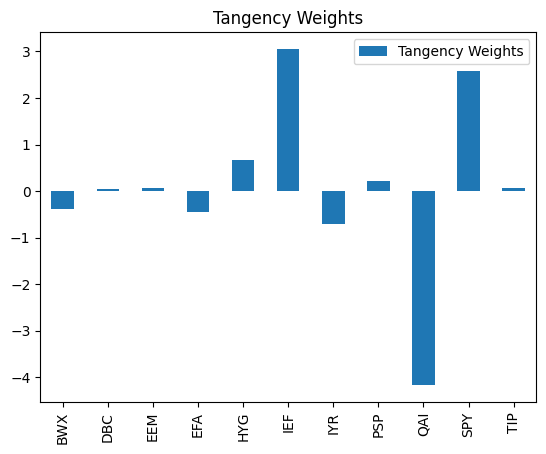

In [190]:
pmh.calc_tangency_weights(assets_excess_returns, return_graphic=True)

In [191]:
pmh.calc_summary_statistics(
    pmh.calc_tangency_weights(assets_excess_returns, return_port_ret=True),
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=['Annualized Sharpe', 'Annualized Mean', 'Annualized Vol']
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio,0.3404,0.1526,2.2301


## 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

<span style="color:blue;">

When the returns of TIPS are modified (+0.1% monthly), we see a decrease in the weight of TIPS in the tangency portfolio, but no real increase in performance.

We can see that when TIPS are removed or modified, most weights stay relatively constant. The biggest changes can be seen in other fixed income ETFs: BWX and IEF.

</span>

In [192]:
TIP_ADJUSTMENT = 0.0001

# Modified TIPS
assets_excess_returns_modified_tips = (
    assets_excess_returns
    .assign(TIP=lambda df: df.TIP + TIP_ADJUSTMENT)
)

# No TIPS
assets_excess_returns_no_tips = assets_excess_returns.drop("TIP", axis=1)

pd.concat([
    pmh.calc_tangency_weights(assets_excess_returns_no_tips, name="No TIPS Tangency"),
    pmh.calc_tangency_weights(assets_excess_returns_modified_tips, name="Mod TIPS Tangency"),
    pmh.calc_tangency_weights(assets_excess_returns)
], axis=1)

,No TIPS Tangency Weights,Mod TIPS Tangency Weights,Tangency Weights
BWX,-0.3764,-0.3662,-0.3735
DBC,0.0519,0.0398,0.0485
EEM,0.0764,0.0607,0.0719
EFA,-0.4583,-0.4203,-0.4476
HYG,0.6680,0.6354,0.6588
IEF,3.1283,2.8546,3.0508
IYR,-0.7178,-0.6980,-0.7122
PSP,0.2304,0.2028,0.2226
QAI,-4.2149,-4.0459,-4.1671
SPY,2.6124,2.5084,2.5830


In [193]:
analysis_tips_portfolios = pd.concat([
    pmh.calc_tangency_weights(assets_excess_returns_modified_tips, name="Mod TIPS Tangency", return_port_ret=True),
    pmh.calc_tangency_weights(assets_excess_returns_no_tips, name="No TIPS Tangency", return_port_ret=True),
    pmh.calc_tangency_weights(assets_excess_returns, return_port_ret=True)
], axis=1)

pmh.calc_summary_statistics(
    analysis_tips_portfolios,
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Mod TIPS Tangency Portfolio,0.3310,0.1484,2.2313
No TIPS Tangency Portfolio,0.3442,0.1543,2.2300
Tangency Portfolio,0.3404,0.1526,2.2301


***

# 3. Allocations

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code.

* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\mu^{*}$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mu^{*}$. Thus, the $i$ element of the weight vector is,

$$\bold{w}^{EW}_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\bold{w}^{RP}_i = \frac{1}{\sigma_i^2}$$

#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\bold{w}^{REG} \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 


### Comparing

In order to compare all these allocation methods, (those above, along with the tangency portfolio obtained in the previous section,) rescale each weight vector, such that it has targeted mean return of $\mu^{*}$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

In [194]:
n_assets = len(assets_excess_returns.columns)
MU_MONTH_TARGET = 0.010

portfolio_equal_weights_not_scaled = pmh.create_portfolio(
    assets_excess_returns,
    weights=[1 / n_assets for _ in range(n_assets)],
    port_name="Equal Weights"
)
portfolio_equal_weights = portfolio_equal_weights_not_scaled * MU_MONTH_TARGET / portfolio_equal_weights_not_scaled.mean()
portfolio_equal_weights

,Equal Weights
date,
2011-02-28,0.0460
2011-03-31,0.0193
2011-04-30,0.0785
2011-05-31,-0.0265
2011-06-30,-0.0349
...,...
2021-08-31,0.0147
2021-09-30,-0.0552
2021-10-31,0.0718


In [195]:
asset_variance_dict = assets_excess_returns.std().map(lambda x: x ** 2).to_dict()
asset_inv_variance_dict = {asset: 1 / variance for asset, variance in asset_variance_dict.items()}
portfolio_risk_parity_not_scaled = pmh.create_portfolio(
    assets_excess_returns,
    weights=asset_inv_variance_dict,
    port_name="Risk Parity"
)
portfolio_risk_parity = portfolio_risk_parity_not_scaled * MU_MONTH_TARGET / portfolio_risk_parity_not_scaled.mean()
portfolio_risk_parity

,Risk Parity
date,
2011-02-28,0.0286
2011-03-31,0.0207
2011-04-30,0.0901
2011-05-31,0.0043
2011-06-30,-0.0177
...,...
2021-08-31,0.0023
2021-09-30,-0.0531
2021-10-31,0.0378


In [196]:
portfolio_tangency_not_scaled = pmh.calc_tangency_weights(assets_excess_returns, return_port_ret=True)
portfolio_tangency = portfolio_tangency_not_scaled * MU_MONTH_TARGET / portfolio_tangency_not_scaled.mean()
portfolio_tangency

,Tangency Portfolio
date,
2011-02-28,0.0151
2011-03-31,-0.0006
2011-04-30,0.0013
2011-05-31,0.0150
2011-06-30,-0.0008
...,...
2021-08-31,0.0177
2021-09-30,-0.0253
2021-10-31,0.0290


In [197]:
portfolio_regularized_not_scaled = pmh.calc_tangency_weights(assets_excess_returns, return_port_ret=True, cov_mat=.5, name="Regularized")
portfolio_regularized = portfolio_regularized_not_scaled * MU_MONTH_TARGET / portfolio_regularized_not_scaled.mean()
portfolio_regularized

,Regularized Portfolio
date,
2011-02-28,0.0190
2011-03-31,-0.0034
2011-04-30,0.0250
2011-05-31,0.0222
2011-06-30,-0.0062
...,...
2021-08-31,0.0159
2021-09-30,-0.0386
2021-10-31,0.0354


In [198]:
portfolios = pd.concat([
    portfolio_equal_weights,
    portfolio_risk_parity,
    portfolio_regularized,
    portfolio_tangency
], axis=1)
pmh.calc_summary_statistics(
    portfolios,
    provided_excess_returns=True,
    annual_factor=12,
    keep_columns=['annualized mean', 'annualized vol', 'annualized sharpe']
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Equal Weights,0.1200,0.2027,0.5919
Risk Parity,0.1200,0.1566,0.7664
Regularized Portfolio,0.1200,0.0769,1.5612
Tangency Portfolio,0.1200,0.0538,2.2301


The highest correlation (88.25%) is between Risk Parity and Equal Weights
The lowest correlation (26.54%) is between Equal Weights and Tangency Portfolio


<Axes: >

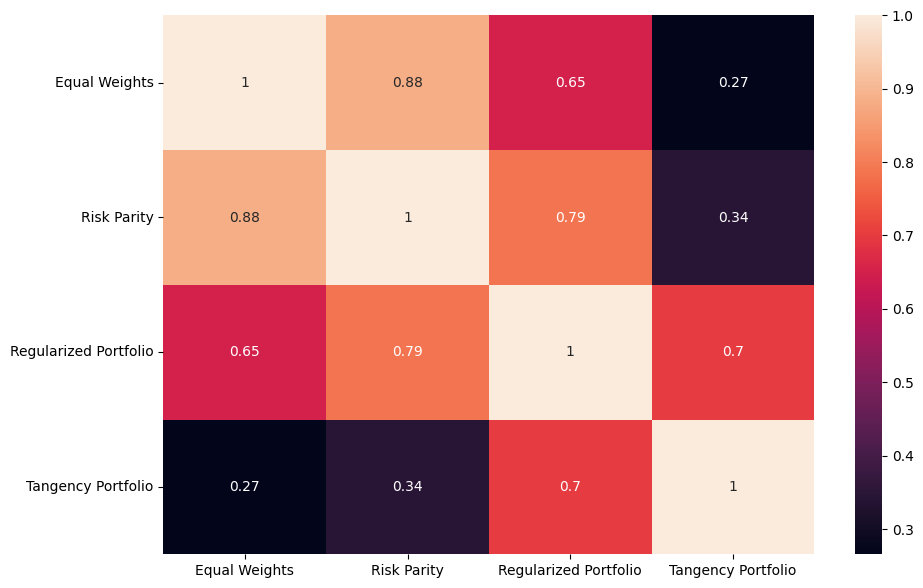

In [199]:
pmh.calc_correlations(portfolios)

***

# 4. Out-of-Sample Performance

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of `2022`, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mu^{*}$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through `2022`,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in `2023-2024`.

In [200]:
IN_SAMPLE_END_DATE = "2018-12-31"
OUT_OF_SAMPLE_START_DATE = "2019-01-01"

in_sample_assets_excess_returns = assets_excess_returns.loc[:IN_SAMPLE_END_DATE]
out_of_sample_assets_excess_returns = assets_excess_returns.loc[OUT_OF_SAMPLE_START_DATE:]

in_sample_assets_excess_returns_no_tips = assets_excess_returns_no_tips.loc[:IN_SAMPLE_END_DATE]
out_of_sample_assets_excess_returns_no_tips = assets_excess_returns_no_tips.loc[OUT_OF_SAMPLE_START_DATE:]

in_sample_assets_excess_returns_modified_tips = assets_excess_returns_modified_tips.loc[:IN_SAMPLE_END_DATE]
out_of_sample_assets_excess_returns_modified_tips = assets_excess_returns_modified_tips.loc[OUT_OF_SAMPLE_START_DATE:]

In [201]:
# Regularized
in_sample_weights_regularized = pmh.calc_tangency_weights(in_sample_assets_excess_returns, cov_mat=.5, name="Regularized")

# Tangency
in_sample_weights_tangency = pmh.calc_tangency_weights(in_sample_assets_excess_returns)

# No TIPS Tangency
in_sample_weights_no_tips = pmh.calc_tangency_weights(in_sample_assets_excess_returns_no_tips, name="No TIPS Tangency")

# Modified TIPS Tangency
in_sample_weights_modified_tips = pmh.calc_tangency_weights(in_sample_assets_excess_returns_modified_tips, name="Mod TIPS Tangency")

# Risk Parity
in_sample_asset_variance_dict = in_sample_assets_excess_returns.std().map(lambda x: x ** 2).to_dict()
in_sample_asset_inv_variance_dict = {asset: 1 / variance for asset, variance in in_sample_asset_variance_dict.items()}
in_sample_weights_risk_parity = pd.DataFrame(in_sample_asset_inv_variance_dict, index=["Risk Parity Weights"]).transpose()

# Equal Weights
in_sample_weights_equal = pd.DataFrame(
    data=[[1 / n_assets] for _ in range(n_assets)],
    columns=["Equal Weights"],
    index=in_sample_assets_excess_returns.columns
)

in_sample_weights = (
    pd.concat([
        in_sample_weights_regularized,
        in_sample_weights_tangency,
        in_sample_weights_no_tips,
        in_sample_weights_modified_tips,
        in_sample_weights_risk_parity,
        in_sample_weights_equal
    ], axis=1)
    .fillna(0)
)

in_sample_weights

,Regularized Weights,Tangency Weights,No TIPS Tangency Weights,Mod TIPS Tangency Weights,Risk Parity Weights,Equal Weights
BWX,-0.1060,0.5014,0.5067,0.4959,"2,566.5642",0.0909
DBC,-0.1705,-0.1759,-0.1726,-0.1792,490.9123,0.0909
EEM,-0.0592,-0.1452,-0.1393,-0.1513,382.9443,0.0909
EFA,-0.0223,-0.4800,-0.4914,-0.4683,646.7271,0.0909
HYG,0.3034,0.6366,0.6488,0.6241,"2,843.0255",0.0909
IEF,0.4574,2.7889,2.9229,2.6514,"4,110.0460",0.0909
IYR,0.0242,-0.9156,-0.9285,-0.9023,615.1179,0.0909
PSP,0.0411,0.3201,0.3308,0.3091,417.2671,0.0909
QAI,-0.0245,-4.4961,-4.5781,-4.4120,"7,469.4150",0.0909
SPY,0.3651,2.8508,2.9007,2.7995,915.7601,0.0909


In [202]:
in_sample_weights_scaled = (
    in_sample_weights
    .apply(lambda weights: weights * MU_MONTH_TARGET / (in_sample_assets_excess_returns @ weights).mean())
)
in_sample_weights_scaled

,Regularized Weights,Tangency Weights,No TIPS Tangency Weights,Mod TIPS Tangency Weights,Risk Parity Weights,Equal Weights
BWX,-0.1495,0.1977,0.1960,0.1994,0.4754,0.3591
DBC,-0.2405,-0.0693,-0.0668,-0.0720,0.0909,0.3591
EEM,-0.0835,-0.0572,-0.0539,-0.0608,0.0709,0.3591
EFA,-0.0315,-0.1892,-0.1901,-0.1883,0.1198,0.3591
HYG,0.4280,0.2510,0.2510,0.2510,0.5267,0.3591
IEF,0.6451,1.0995,1.1307,1.0662,0.7614,0.3591
IYR,0.0341,-0.3610,-0.3592,-0.3629,0.1139,0.3591
PSP,0.0579,0.1262,0.1280,0.1243,0.0773,0.3591
QAI,-0.0346,-1.7726,-1.7710,-1.7742,1.3837,0.3591
SPY,0.5150,1.1239,1.1221,1.1258,0.1696,0.3591


In [203]:
(   
    pmh.calc_summary_statistics(
        in_sample_assets_excess_returns @ in_sample_weights_scaled,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Annualized mean', 'Annualized vol', 'Annualized sharpe']
    )
    .sort_values('Annualized Sharpe', ascending=False)
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Weights,0.1200,0.0481,2.4942
No TIPS Tangency Weights,0.1200,0.0481,2.4937
Mod TIPS Tangency Weights,0.1200,0.0481,2.4936
Regularized Weights,0.1200,0.0746,1.6089
Risk Parity Weights,0.1200,0.2073,0.5789
Equal Weights,0.1200,0.3129,0.3836


In [204]:
out_of_sample_assets_excess_returns

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
date,,,,,,,,,,,
2019-01-31,0.0117,0.0686,0.1010,0.0639,0.0470,0.0041,0.1123,0.1074,0.0253,0.0776,0.0118
2019-02-28,-0.0124,0.0267,-0.0169,0.0238,0.0105,-0.0069,0.0057,0.0263,0.0071,0.0308,-0.0033
2019-03-31,0.0067,-0.0060,0.0091,0.0070,0.0107,0.0243,0.0395,0.0004,0.0021,0.0159,0.0175
2019-04-30,-0.0074,0.0100,0.0216,0.0274,0.0080,-0.0071,-0.0024,0.0549,0.0047,0.0389,0.0003
2019-05-31,0.0090,-0.0621,-0.0757,-0.0528,-0.0218,0.0281,-0.0039,-0.0561,-0.0153,-0.0662,0.0151
2019-06-30,0.0319,0.0373,0.0597,0.0568,0.0292,0.0098,0.0104,0.0549,0.0157,0.0672,0.0051
2019-07-31,-0.0146,-0.0131,-0.0282,-0.0211,-0.0001,-0.0012,0.0222,-0.0050,-0.0029,0.0135,0.0015
2019-08-31,0.0163,-0.0486,-0.0401,-0.0215,0.0046,0.0373,0.0321,-0.0132,-0.0052,-0.0190,0.0210
2019-09-30,-0.0116,0.0127,0.0155,0.0302,0.0030,-0.0133,0.0175,0.0211,0.0029,0.0180,-0.0125


In [205]:
(
    pmh.calc_summary_statistics(
        out_of_sample_assets_excess_returns @ in_sample_weights_scaled,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['annualized mean', 'annualized vol', 'annualized sharpe']
    )
    .sort_values('Annualized Sharpe', ascending=False)
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Mod TIPS Tangency Weights,0.1888,0.0965,1.9573
Tangency Weights,0.1877,0.0961,1.9533
No TIPS Tangency Weights,0.1866,0.0957,1.9493
Regularized Weights,0.1650,0.1016,1.6233
Risk Parity Weights,0.3138,0.2696,1.1637
Equal Weights,0.4495,0.4477,1.0040


## 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of `2015`, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (`2016`.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through `2023` and applying them to the returns in `2024`.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

In [206]:
def rolling_oos_performance(
        assets_excess_returns,
        in_sample_end_date,
        out_of_sample_start_date,
        out_of_sample_end_date
    ):
    assets_excess_returns = assets_excess_returns.copy()

    in_sample_assets_excess_returns = assets_excess_returns.loc[:in_sample_end_date]
    out_of_sample_assets_excess_returns = (
        assets_excess_returns.loc[out_of_sample_start_date:out_of_sample_end_date]
    )

    # Regularized
    in_sample_weights_regularized = pmh.calc_tangency_weights(in_sample_assets_excess_returns, cov_mat=.5, name="Regularized")

    # Tangency
    in_sample_weights_tangency = pmh.calc_tangency_weights(in_sample_assets_excess_returns)

    # No TIPS Tangency
    in_sample_weights_no_tips = pmh.calc_tangency_weights(in_sample_assets_excess_returns_no_tips, name="No TIPS Tangency")

    # Modified TIPS Tangency
    in_sample_weights_modified_tips = pmh.calc_tangency_weights(in_sample_assets_excess_returns_modified_tips, name="Mod TIPS Tangency")

    # Risk Parity
    in_sample_asset_variance_dict = in_sample_assets_excess_returns.std().map(lambda x: x ** 2).to_dict()
    in_sample_asset_inv_variance_dict = {asset: 1 / variance for asset, variance in in_sample_asset_variance_dict.items()}
    in_sample_weights_risk_parity = pd.DataFrame(in_sample_asset_inv_variance_dict, index=["Risk Parity Weights"]).transpose()

    # Equal Weights
    in_sample_weights_equal = pd.DataFrame(
        data=[[1 / n_assets] for _ in range(n_assets)],
        columns=["Equal Weights"],
        index=in_sample_assets_excess_returns.columns
    )

    # Join Weights
    in_sample_weights = (
        pd.concat([
            in_sample_weights_regularized,
            in_sample_weights_tangency,
            in_sample_weights_no_tips,
            in_sample_weights_modified_tips,
            in_sample_weights_risk_parity,
            in_sample_weights_equal
        ], axis=1)
        .fillna(0)
    )

    # Rescale Weights
    in_sample_weights_scaled = (
        in_sample_weights
        .apply(lambda weights: weights * MU_MONTH_TARGET / (in_sample_assets_excess_returns @ weights).mean())
    )

    return out_of_sample_assets_excess_returns @ in_sample_weights_scaled


oos_portfolios_performance = pd.DataFrame({})

for in_sample_last_year in range(2015, 2024):
    oos_portfolios_yearly_performance = rolling_oos_performance(
        assets_excess_returns,
        f"{in_sample_last_year}-12-31",
        f"{in_sample_last_year+1}-01-01",
        f"{in_sample_last_year+1}-12-31"
    )
    oos_portfolios_performance = pd.concat([oos_portfolios_performance, oos_portfolios_yearly_performance])

oos_portfolios_performance

,Regularized Weights,Tangency Weights,No TIPS Tangency Weights,Mod TIPS Tangency Weights,Risk Parity Weights,Equal Weights
date,,,,,,
2016-01-31,0.0011,0.0148,0.0204,0.0205,-0.0186,-0.1281
2016-02-29,0.0051,0.0218,0.0242,0.0245,0.0422,0.0024
2016-03-31,0.0168,0.0052,0.0014,0.0016,0.1226,0.2520
2016-04-30,-0.0169,-0.0117,-0.0048,-0.0049,0.0394,0.0690
2016-05-31,0.0124,0.0113,0.0131,0.0127,-0.0201,-0.0044
...,...,...,...,...,...,...
2021-08-31,0.0144,0.0151,0.0161,0.0161,0.0020,0.0166
2021-09-30,-0.0454,-0.0365,-0.0323,-0.0318,-0.0524,-0.0625
2021-10-31,0.0229,0.0238,0.0245,0.0249,0.0376,0.0812


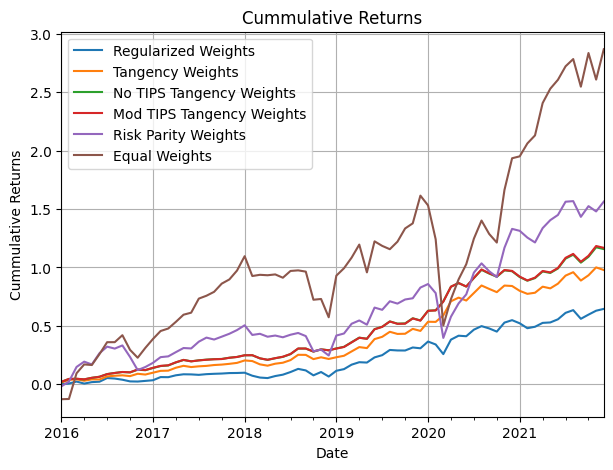

In [207]:
pmh.calc_cummulative_returns(oos_portfolios_performance)

In [208]:
pmh.calc_summary_statistics(
    oos_portfolios_performance,
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe']
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Regularized Weights,0.0866,0.0829,1.0448
Tangency Weights,0.1167,0.0715,1.6312
No TIPS Tangency Weights,0.1312,0.0704,1.8632
Mod TIPS Tangency Weights,0.1321,0.0709,1.8628
Risk Parity Weights,0.1759,0.1891,0.9302
Equal Weights,0.2706,0.2897,0.9339


***

# 5. Without a Riskless Asset

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the `Mean-Variance` section of the notes.
* This essentially substitutes the risk-free rate with the minimum-variance portfolio.
* Now, the allocation depends nonlinearly on the target mean return, $\mu^{*}$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)

You will find that, conceptually, the answers are very similar. 

In [209]:
assets_total_returns = pmh.read_excel_default("data/multi_asset_etf_data_last_year.xlsx", sheet_name="total returns")
assets_total_returns.drop("SHV", axis=1, inplace=True)

minimum_variance_weights = pmh.calc_gmv_weights(assets_total_returns)
tangency_weights = pmh.calc_tangency_weights(assets_total_returns)

total_returns_weights = pd.concat([tangency_weights, minimum_variance_weights], axis=1)
total_returns_weights

,Tangency Weights,GMV Weights
BWX,-0.8631,-0.1394
DBC,0.0185,0.0032
EEM,0.1066,-0.0755
EFA,0.2528,0.0180
HYG,0.8987,0.1513
IEF,1.0482,0.0577
IYR,-0.1350,-0.0106
PSP,-0.7424,-0.1193
QAI,-1.2265,1.0333
SPY,1.3678,-0.0759


In [210]:
total_return_portfolios = pd.concat([
    pmh.calc_gmv_weights(assets_total_returns, return_port_ret=True),
    pmh.calc_tangency_weights(assets_total_returns, return_port_ret=True)
], axis=1)

(
    pmh.calc_summary_statistics(
        total_return_portfolios,
        annual_factor=12,
        keep_columns=["Mean", "Vol", "Sharpe"]
    )
    .transpose()
)

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,GMV Portfolio,Tangency Portfolio
Mean,0.0013,0.0177
Annualized Mean,0.0158,0.2119
Vol,0.0084,0.0308
Annualized Vol,0.0291,0.1067
Sharpe,0.1567,0.5735
Annualized Sharpe,0.5427,1.9865


In [211]:
total_return_portfolios

,GMV Portfolio,Tangency Portfolio
date,,
2009-04-30,-0.0089,0.0256
2009-05-31,0.0073,0.0191
2009-06-30,-0.0025,-0.0106
2009-07-31,-0.0078,0.0442
2009-08-31,-0.0127,0.0107
...,...,...
2023-04-30,0.0022,0.0077
2023-05-31,-0.0044,0.0130
2023-06-30,0.0101,0.0298


$$
r_p = r_t \omega + r_v (1 - \omega)
$$

$$
r_p = r_t \omega + r_v - r_v \omega
$$

$$
r_p - r_v = (r_t - r_v) \omega
$$

$$
\omega = \frac{r_p - r_v}{(r_t - r_v)}
$$

In [212]:
r_v = total_return_portfolios["GMV Portfolio"].mean()
r_p = MU_MONTH_TARGET
r_t = total_return_portfolios["Tangency Portfolio"].mean()
omega = (r_p - r_v) / (r_t - r_v)
print(f"Omega: {omega:.4f}")

Omega: 0.5313


In [213]:
(
    total_returns_weights
    .assign(
        target_return_weights=lambda df: (
            df["Tangency Weights"] * omega
            + df["GMV Weights"] * (1 - omega)
        )
    )
    .rename({"target_return_weights": "Target Return Weights"}, axis=1)
)

,Tangency Weights,GMV Weights,Target Return Weights
BWX,-0.8631,-0.1394,-0.5239
DBC,0.0185,0.0032,0.0113
EEM,0.1066,-0.0755,0.0213
EFA,0.2528,0.0180,0.1427
HYG,0.8987,0.1513,0.5484
IEF,1.0482,0.0577,0.5839
IYR,-0.1350,-0.0106,-0.0767
PSP,-0.7424,-0.1193,-0.4503
QAI,-1.2265,1.0333,-0.1672
SPY,1.3678,-0.0759,0.6911


In [214]:
pmh.calc_target_ret_weights(MU_MONTH_TARGET, assets_total_returns)

,Target 1.00% Weights,Tangency Weights,GMV Weights
BWX,-0.5239,-0.8631,-0.1394
DBC,0.0113,0.0185,0.0032
EEM,0.0213,0.1066,-0.0755
EFA,0.1427,0.2528,0.0180
HYG,0.5484,0.8987,0.1513
IEF,0.5839,1.0482,0.0577
IYR,-0.0767,-0.1350,-0.0106
PSP,-0.4503,-0.7424,-0.1193
QAI,-0.1672,-1.2265,1.0333
SPY,0.6911,1.3678,-0.0759


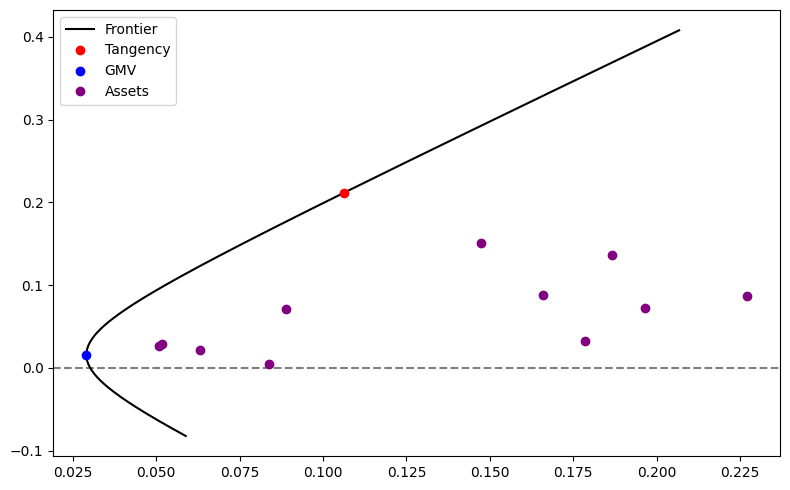

In [215]:
def calc_efficient_frontier(returns, omega_range=[-0.5, 2], return_graphic=False, figsize=(8, 5), annual_factor = 12):
    omega_range = [min(omega_range[0], 0), max(omega_range[1], 1)]
    gmv_returns = pmh.calc_gmv_weights(returns, return_port_ret=True).squeeze()
    tangency_returns = pmh.calc_tangency_weights(returns, return_port_ret=True).squeeze()
    omega_to_efficient_frontier_dict = {}

    for omega in range(int(omega_range[0] * 100), int(omega_range[1] * 100) + 1, 1):
        target_returns = tangency_returns.values * omega / 1e2 + gmv_returns.values * (1 - omega / 1e2)
        omega_to_efficient_frontier_dict[f"{(omega / 1e2):.2f}"] = [target_returns.mean() * annual_factor, target_returns.std() * np.sqrt(annual_factor)]

    efficient_frontier = pd.DataFrame(omega_to_efficient_frontier_dict, index=["Return", "Volatility"]).transpose()

    if not return_graphic:
        return efficient_frontier
    
    plt.figure(figsize=figsize)
    plt.axhline(y=0, linestyle='--', color='black', alpha=0.5)
    plt.plot(
        efficient_frontier['Volatility'],
        efficient_frontier['Return'],
        linestyle='-', marker='', color="black", label="Frontier"
    )
    plt.plot(
        efficient_frontier.loc["1.00", "Volatility"],
        efficient_frontier.loc["1.00", 'Return'], 
        linestyle='', marker='o', color="red", label="Tangency"
    )
    plt.plot(
        efficient_frontier.loc["0.00", "Volatility"],
        efficient_frontier.loc["0.00", 'Return'],
        linestyle='', marker='o', color="blue", label="GMV"
    )

    plt.plot(
        returns.std() * np.sqrt(annual_factor),
        returns.mean() * annual_factor, 
        linestyle='', marker='o', color="purple", label="Assets"
    )
    plt.legend()
    plt.tight_layout()
    plt.show()

calc_efficient_frontier(assets_total_returns, return_graphic=True)

***